In [1]:
import pandas as pd

In [2]:
features=pd.read_csv('features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
features['CPI'].fillna(features['CPI'].mean(),inplace=True)

In [4]:
features['Unemployment'].fillna(features['Unemployment'].mean(),inplace=True)

In [5]:
features.fillna(0,inplace=True)

In [6]:
train=pd.read_csv('train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
stores=pd.read_csv('stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [9]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
df=pd.merge(features,train,on=['Store','Date','IsHoliday'],how='inner')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38


In [11]:
finaldf=pd.merge(df,stores,on=['Store'],how='inner')
finaldf.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [12]:
finaldf=finaldf.sort_values(by='Date')
finaldf.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681


In [13]:
finaldf.shape

(421570, 16)

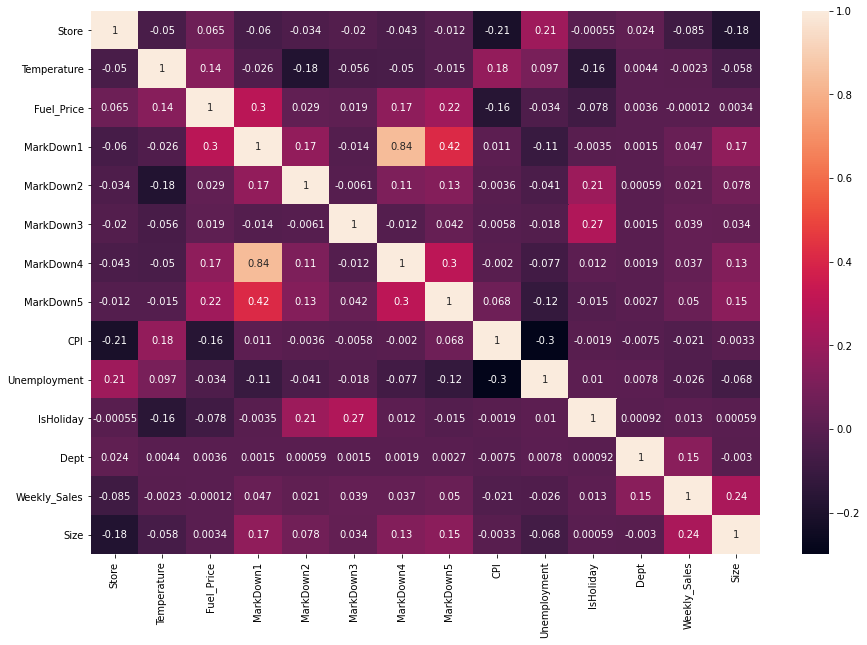

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=finaldf.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [15]:
final_test_df=pd.read_csv('test.csv')
final_test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [16]:
finaldf["Year"] = pd.to_datetime(finaldf["Date"], format="%Y-%m-%d").dt.year
final_test_df["Year"] = pd.to_datetime(final_test_df["Date"], format="%Y-%m-%d").dt.year
finaldf["Day"] = pd.to_datetime(finaldf["Date"], format="%Y-%m-%d").dt.day
final_test_df["Day"] = pd.to_datetime(final_test_df["Date"], format="%Y-%m-%d").dt.day
finaldf["Days to Next Christmas"] = (pd.to_datetime(finaldf["Year"].astype(str)+"-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(finaldf["Date"], format="%Y-%m-%d")).dt.days.astype(int)
final_test_df["Days to Next Christmas"] = (pd.to_datetime(final_test_df["Year"].astype(str) + "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(final_test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
finaldf=finaldf.drop(columns='Date')

In [17]:
finaldf

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Day,Days to Next Christmas
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315,2010,5,329
330761,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,3,14612.19,B,103681,2010,5,329
330762,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,4,26323.15,B,103681,2010,5,329
330763,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,5,36414.63,B,103681,2010,5,329
330764,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,6,11437.81,B,103681,2010,5,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,49,7770.71,A,219622,2012,26,66
128052,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,50,1486.00,A,219622,2012,26,66
128053,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,52,4738.93,A,219622,2012,26,66
390991,41,41.80,3.686,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,False,4,32699.78,A,196321,2012,26,66


In [18]:
tp=pd.get_dummies(finaldf.Type)
finaldf=pd.concat([finaldf,tp],axis=1)
finaldf=finaldf.drop(columns='Type')
finaldf

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Year,Day,Days to Next Christmas,A,B,C
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,151315,2010,5,329,1,0,0
330761,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,3,14612.19,103681,2010,5,329,0,1,0
330762,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,4,26323.15,103681,2010,5,329,0,1,0
330763,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,5,36414.63,103681,2010,5,329,0,1,0
330764,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,6,11437.81,103681,2010,5,329,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,49,7770.71,219622,2012,26,66,1,0,0
128052,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,50,1486.00,219622,2012,26,66,1,0,0
128053,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,52,4738.93,219622,2012,26,66,1,0,0
390991,41,41.80,3.686,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,False,4,32699.78,196321,2012,26,66,1,0,0


In [19]:
y=finaldf['Weekly_Sales']
X=finaldf.drop(columns='Weekly_Sales')

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [23]:
print(knn.score(X_test,y_test))

0.19956184359959184


In [24]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_test))

0.0


In [25]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [26]:
print(dt.score(X_test,y_test))

0.9614203818029347


In [27]:
# After Hyper-parameter tunning
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [28]:
print(rfr.score(X_test,y_test))

0.9654135552311615


In [35]:
from xgboost import XGBRegressor

In [36]:
xgb_clf = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)

[11:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [37]:
print(xgb_clf.score(X_test,y_test))

0.9719834592929779


In [38]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

In [39]:
print(etr.score(X_test,y_test))

0.9648741676767165
